# Analysis notebook for mapping evaluation

Assumes results generated - see Makefile for details

In [1]:
task = "fbbt-zfa"
#task = "fbbt-wbbt"
#task = "hsapdv-mmusdv"

In [2]:
# Parameters
task = "fbbt-wbbt"


In [3]:
import pandas as pd

In [4]:
%run md_utils.py

## Utility SSSOM loading methods

In [5]:
def task_method_sssom_path(method: str):
    if method == "curated":
        dir = "data"
    else:
        dir = "results"
    return f"../{dir}/{method}-{task}.sssom.tsv"

In [6]:
def load_sssom(method):
    path = task_method_sssom_path(method)
    df = pd.read_csv(path, sep="\t", comment="#")
    df["mapping_source"]  = method
    if method == "lexmatch":
        df[["predicate_id"]] = "skos:exactMatch"
    return df.drop_duplicates()

lexmatch = load_sssom("lexmatch")
lexmatch

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,organism,lexmatch
1,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,head,lexmatch
2,FBbt:00000034,egg,skos:exactMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,lexmatch
3,FBbt:00000092,primordial germ cell,skos:exactMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,lexmatch
4,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,epithelial cell,lexmatch
...,...,...,...,...,...,...,...,...,...,...,...,...
234,FBbt:00111153,adult posterior brain cell body rind,skos:exactMatch,WBbt:0004405,PCBR,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,rdfs:label,pcbr,lexmatch
235,FBbt:00111201,dopaminergic medulla neuron,skos:exactMatch,WBbt:0003638,MC neuron,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,rdfs:label,mc neuron,lexmatch
236,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:exactMatch,WBbt:0006512,Da,semapv:LexicalMatching,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,da,lexmatch
237,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:exactMatch,WBbt:0006718,Dp,semapv:LexicalMatching,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,dp,lexmatch


In [7]:
lexmatch.groupby(["subject_match_field", "object_match_field"]).count()

subject_id  subject_label   
subject_match_field   object_match_field                                 
oio:hasBroadSynonym   oio:hasRelatedSynonym           7              7  \
                      rdfs:label                     21             21   
oio:hasDbXref         oio:hasDbXref                   7              7   
oio:hasExactSynonym   oio:hasRelatedSynonym          16             16   
                      rdfs:label                    104            104   
oio:hasNarrowSynonym  rdfs:label                      3              3   
oio:hasRelatedSynonym oio:hasRelatedSynonym           6              6   
                      rdfs:label                     14             14   
rdfs:label            oio:hasRelatedSynonym          11             11   
                      rdfs:label                     49             49   

                                             predicate_id  object_id   
subject_match_field   object_match_field                               
oio:hasBroadSynonym   oio:hasRelatedSynonym             7          7  \
                      rdfs:label                       21         21   
oio:hasDbXref         oio:hasDbXref                     7          7   
oio:hasExactSynonym   oio:hasRelatedSynonym            16         16   
                      rdfs:label                      104        104   
oio:hasNarrowSynonym  rdfs:label                        3          3   
oio:hasRelatedSynonym oio:hasRelatedSynonym             6          6   
                      rdfs:label                       14         14   
rdfs:label            oio:hasRelatedSynonym            11         11   
                      rdfs:label                       49         49   

                                             object_label   
subject_match_field   object_match_field                    
oio:hasBroadSynonym   oio:hasRelatedSynonym             7  \
                      rdfs:label                       21   
oio:hasDbXref         oio:hasDbXref                     7   
oio:hasExactSynonym   oio:hasRelatedSynonym            16   
                      rdfs:label                      104   
oio:hasNarrowSynonym  rdfs:label                        3   
oio:hasRelatedSynonym oio:hasRelatedSynonym             6   
                      rdfs:label                       14   
rdfs:label            oio:hasRelatedSynonym            11   
                      rdfs:label                       49   

                                             mapping_justification   
subject_match_field   object_match_field                             
oio:hasBroadSynonym   oio:hasRelatedSynonym                      7  \
                      rdfs:label                                21   
oio:hasDbXref         oio:hasDbXref                              7   
oio:hasExactSynonym   oio:hasRelatedSynonym                     16   
                      rdfs:label                               104   
oio:hasNarrowSynonym  rdfs:label                                 3   
oio:hasRelatedSynonym oio:hasRelatedSynonym                      6   
                      rdfs:label                                14   
rdfs:label            oio:hasRelatedSynonym                     11   
                      rdfs:label                                49   

                                             mapping_tool  confidence   
subject_match_field   object_match_field                                
oio:hasBroadSynonym   oio:hasRelatedSynonym             7           7  \
                      rdfs:label                       21          21   
oio:hasDbXref         oio:hasDbXref                     7           7   
oio:hasExactSynonym   oio:hasRelatedSynonym            16          16   
                      rdfs:label                      104         104   
oio:hasNarrowSynonym  rdfs:label                        3           3   
oio:hasRelatedSynonym oio:hasRelatedSynonym             6           6   
                      rdfs:label                       14   

In [8]:
curated = load_sssom("curated")
curated

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000468,curated
4,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000468,curated
20,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000033,curated
24,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000033,curated
40,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000066,curated
...,...,...,...,...,...,...,...,...,...,...,...,...
683,FBbt:00047153,anus,skos:exactMatch,WBbt:0005364,anus,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0001245,curated
687,FBbt:00047153,anus,skos:exactMatch,WBbt:0005364,anus,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0001245,curated
703,FBbt:00100291,glutamatergic neuron,skos:exactMatch,WBbt:0006829,glutamatergic neuron,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000679,curated
707,FBbt:10000000,anatomical entity,skos:exactMatch,WBbt:0000100,C. elegans anatomical entity,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0001062,curated


In [9]:
gpt3 = load_sssom("gpt3")
gpt3

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:narrowMatch,WBbt:0007833,organism,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,organism,gpt3
1,FBbt:00000004,head,skos:relatedMatch,WBbt:0005739,head,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,head,gpt3
2,FBbt:00000034,egg,skos:narrowMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,gpt3
3,FBbt:00000092,primordial germ cell,skos:narrowMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,gpt3
4,FBbt:00000124,epithelial cell,skos:broadMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,epithelial cell,gpt3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,FBbt:00111153,adult posterior brain cell body rind,owl:differentFrom,WBbt:0004405,PCBR,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,rdfs:label,pcbr,gpt3
235,FBbt:00111201,dopaminergic medulla neuron,owl:differentFrom,WBbt:0003638,MC neuron,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,rdfs:label,mc neuron,gpt3
236,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,WBbt:0006512,Da,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,da,gpt3
237,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,WBbt:0006718,Dp,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,dp,gpt3


In [10]:
gpt4 = load_sssom("gpt4")
gpt4

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,organism,gpt4
1,FBbt:00000004,head,skos:relatedMatch,WBbt:0005739,head,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,head,gpt4
2,FBbt:00000034,egg,skos:narrowMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,gpt4
3,FBbt:00000092,primordial germ cell,skos:relatedMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,gpt4
4,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,epithelial cell,gpt4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,FBbt:00111153,adult posterior brain cell body rind,owl:differentFrom,WBbt:0004405,PCBR,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,rdfs:label,pcbr,gpt4
235,FBbt:00111201,dopaminergic medulla neuron,owl:differentFrom,WBbt:0003638,MC neuron,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,rdfs:label,mc neuron,gpt4
236,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,WBbt:0006512,Da,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,da,gpt4
237,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,WBbt:0006718,Dp,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,dp,gpt4


In [11]:
pd.concat([gpt3, gpt4]).groupby(["mapping_source", "predicate_id"]).count()

subject_id  subject_label  object_id   
mapping_source predicate_id                                              
gpt3           owl:differentFrom         128            128        128  \
               skos:broadMatch            22             22         22   
               skos:exactMatch            19             19         19   
               skos:narrowMatch           45             45         45   
               skos:relatedMatch          24             24         24   
gpt4           owl:differentFrom         135            135        135   
               skos:broadMatch             1              1          1   
               skos:exactMatch            56             56         56   
               skos:narrowMatch            4              4          4   
               skos:relatedMatch          42             42         42   

                                  object_label  mapping_justification   
mapping_source predicate_id                                             
gpt3           owl:differentFrom           128                    128  \
               skos:broadMatch              22                     22   
               skos:exactMatch              19                     19   
               skos:narrowMatch             45                     45   
               skos:relatedMatch            24                     24   
gpt4           owl:differentFrom           135                    135   
               skos:broadMatch               1                      1   
               skos:exactMatch              56                     56   
               skos:narrowMatch              4                      4   
               skos:relatedMatch            42                     42   

                                  subject_source  object_source  mapping_tool   
mapping_source predicate_id                                                     
gpt3           owl:differentFrom             128            128           128  \
               skos:broadMatch                22             22            22   
               skos:exactMatch                19             19            19   
               skos:narrowMatch               45             45            45   
               skos:relatedMatch              24             24            24   
gpt4           owl:differentFrom             135            135           135   
               skos:broadMatch                 1              1             1   
               skos:exactMatch                56             56            56   
               skos:narrowMatch                4              4             4   
               skos:relatedMatch              42             42            42   

                                  confidence  subject_match_field   
mapping_source predicate_id                                         
gpt3           owl:differentFrom         128                  128  \
               skos:broadMatch            22                   22   
               skos:exactMatch            19                   19   
               skos:narrowMatch           45                   45   
               skos:relatedMatch          24                   24   
gpt4           owl:differentFrom         135                  135   
               skos:broadMatch             1                    1   
               skos:exactMatch            56                   56   
               skos:narrowMatch            4                    4   
               skos:relatedMatch          42                   42   

                                  object_match_field  match_string  
mapping_source predicate_id                                         
gpt3           owl:differentFrom                 128           128  
               skos:broadMatch                    22            22  
               skos:exactMatch                    19            19  
               skos:narrowMatch                   45            45  
               skos:relatedMatch                  24

In [12]:
logmap = load_sssom("logmap")
logmap

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,FBbt:00005173,WBbt:0005762,0.51,skos:exactMatch,thecogen cell,accessory cell,logmap
1,FBbt:00005171,WBbt:0008418,0.78,skos:exactMatch,tormogen cell,IL socket cell,logmap
2,FBbt:00005171,WBbt:0005750,0.54,skos:exactMatch,tormogen cell,socket cell,logmap
3,FBbt:00003372,WBbt:0003675,0.52,skos:exactMatch,tergosternal muscle cell,muscle cell,logmap
4,FBbt:00004924,WBbt:0006760,0.75,skos:exactMatch,uterus,uterus,logmap
...,...,...,...,...,...,...,...
95,FBbt:00007290,WBbt:0008074,0.71,skos:exactMatch,syncytium,syncytium,logmap
96,FBbt:00058317,WBbt:0005373,0.45,skos:exactMatch,hypodermal muscle of head,anterior hypodermis,logmap
97,FBbt:00003708,WBbt:0005756,0.71,skos:exactMatch,lamina,basal lamina,logmap
98,FBbt:00047143,WBbt:0005772,0.71,skos:exactMatch,gut,intestine,logmap


In [13]:
def filter_logmap(df, thresh: float):
    return df.query(f"confidence > {thresh}")
filter_logmap(logmap, 0.8)

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
7,FBbt:00007152,WBbt:0006929,0.87,skos:exactMatch,sensillum,sensillum,logmap
8,FBbt:00004826,WBbt:0008422,0.89,skos:exactMatch,genitalia,sex organ,logmap
11,FBbt:00004856,WBbt:0005746,0.84,skos:exactMatch,organ system,Organ system,logmap
15,FBbt:00004936,WBbt:0006799,0.90,skos:exactMatch,spermatocyte,spermatocyte,logmap
19,FBbt:00005286,WBbt:0008591,0.88,skos:exactMatch,primary spermatocyte,primary spermatocyte,logmap
20,FBbt:00007004,WBbt:0007850,0.89,skos:exactMatch,male organism,male,logmap
21,FBbt:00007002,WBbt:0004017,0.81,skos:exactMatch,cell,Cell,logmap
23,FBbt:00007001,WBbt:0005766,0.93,skos:exactMatch,anatomical structure,Anatomy,logmap
24,FBbt:00004968,WBbt:0005337,0.87,skos:exactMatch,vas deferens,vas deferens,logmap
26,FBbt:00005124,WBbt:0005759,0.93,skos:exactMatch,sensory neuron,sensory neuron,logmap


In [14]:
def evaluate(results, gold):
    # filtered = results.query("predicate_id != 'owl:differentFrom'")
    filtered = results.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "object_id"]
    results_set = set([tuple(x) for x in filtered[cols].values])
    gold_set = set([tuple(x) for x in gold[cols].values])

    # Calculate TP, FP, FN
    TP = len(results_set.intersection(gold_set))
    FP = len(results_set.difference(gold_set))
    FN = len(gold_set.difference(results_set))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate F1 score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return F1, precision, recall

evaluate(gpt3, curated)

(0.3448275862068965, 0.625, 0.23809523809523808)

In [15]:
pairs = [(conf, evaluate(filter_logmap(logmap, conf), curated)[0]) for conf in sorted(set(pd.unique(logmap['confidence'])))]
pairs = sorted(pairs, key=lambda x: -x[1])
pairs[0:5]

[(0.74, 0.5894736842105263),
 (0.73, 0.5858585858585859),
 (0.71, 0.5825242718446602),
 (0.69, 0.5555555555555556),
 (0.68, 0.5454545454545455)]

In [16]:
logmap_best = filter_logmap(logmap, pairs[0][0])
logmap_best

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
1,FBbt:00005171,WBbt:0008418,0.78,skos:exactMatch,tormogen cell,IL socket cell,logmap
4,FBbt:00004924,WBbt:0006760,0.75,skos:exactMatch,uterus,uterus,logmap
5,FBbt:00004921,WBbt:0005319,0.75,skos:exactMatch,spermatheca,spermatheca,logmap
7,FBbt:00007152,WBbt:0006929,0.87,skos:exactMatch,sensillum,sensillum,logmap
8,FBbt:00004826,WBbt:0008422,0.89,skos:exactMatch,genitalia,sex organ,logmap
11,FBbt:00004856,WBbt:0005746,0.84,skos:exactMatch,organ system,Organ system,logmap
12,FBbt:00004857,WBbt:0005747,0.77,skos:exactMatch,reproductive system,reproductive system,logmap
13,FBbt:00001408,WBbt:0008594,0.77,skos:exactMatch,neuroblast X,neuroblast,logmap
15,FBbt:00004936,WBbt:0006799,0.90,skos:exactMatch,spermatocyte,spermatocyte,logmap
19,FBbt:00005286,WBbt:0008591,0.88,skos:exactMatch,primary spermatocyte,primary spermatocyte,logmap


In [17]:
def mk_results(dfs):
    combined = pd.concat(dfs)
    objs = []
    for df in dfs:
        methods = set(pd.unique(df["mapping_source"]))
        assert len(methods) == 1
        method = list(methods)[0]
        f1, p, r = evaluate(df, curated)
        objs.append({"method": method, "f1": f1, "P": p, "R": r})
    return pd.DataFrame(objs)
    
  

summary = mk_results([lexmatch, logmap_best, gpt3, gpt4])
#summary.to_markdown(f"main-results-{task}.md")
as_md_table(summary, f"table-main-results-{task}.md")
summary.style.highlight_max(props='font-weight:bold').format(precision=3)

,method,f1,P,R
0,lexmatch,0.264,0.156,0.857
1,logmap,0.589,0.528,0.667
2,gpt3,0.345,0.625,0.238
3,gpt4,0.630,0.580,0.690


In [18]:
import matplotlib.pyplot as plt

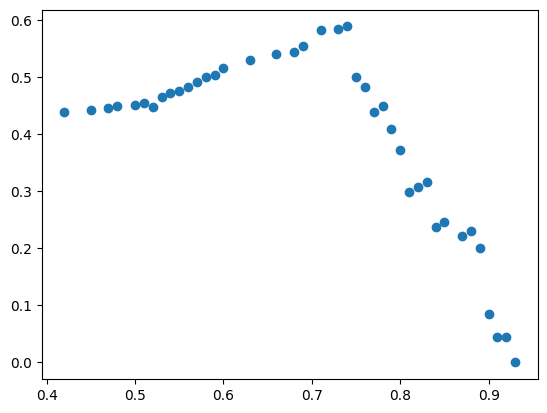

In [19]:
x, y = zip(*pairs)

# Create a scatter plot
plt.scatter(x, y)

# Show the plot
plt.show()

In [20]:
import seaborn as sns

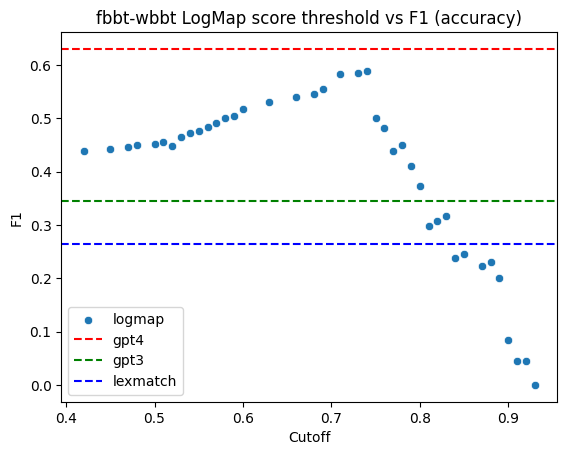

In [21]:
df = pd.DataFrame(pairs, columns=['Cutoff', 'F1'])

# Create a scatter plot
sns.scatterplot(data=df, x='Cutoff', y='F1', label="logmap")

lines = [(gpt4, "gpt4", "red"), (gpt3, "gpt3", "green"), (lexmatch, "lexmatch", "blue")]

for r, label, color in lines:
    plt.axhline(evaluate(r, curated)[0], color=color, linestyle='--', label=label)

plt.legend()

# Adding labels
plt.xlabel('Cutoff')
plt.ylabel('F1')
plt.title(f'{task} LogMap score threshold vs F1 (accuracy)')

plt.savefig(f"../content/images/logmap-scatter-plot-{task}.pdf", format='pdf')

# Show the plot
plt.show()

In [22]:
import plotly

In [23]:
import plotly.io as pio
pio.renderers.default='notebook'

In [24]:
plt.savefig(f"logmap-scatter-plot-{task}.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig(f"logmap-scatter-plot-{task}.png", format='png')

<Figure size 640x480 with 0 Axes>

In [26]:
def diffs(x, y):
    x2 = x.query("predicate_id == 'skos:exactMatch'")
    y2 = y.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "subject_label", "object_id", "object_label"]
    xset = set([tuple(v) for v in x2[cols].values])
    yset = set([tuple(v) for v in y2[cols].values])
    return xset-yset

diffs(logmap_best, gpt4)

{('FBbt:00000004', 'head', 'WBbt:0005739', 'head'),
 ('FBbt:00000440', 'proctodeum', 'WBbt:0006795', 'proctodeum'),
 ('FBbt:00001102',
  'larval ventral nerve cord',
  'WBbt:0005829',
  'ventral nerve cord'),
 ('FBbt:00001408', 'neuroblast X', 'WBbt:0008594', 'neuroblast'),
 ('FBbt:00001454', 'RP2sib neuron', 'WBbt:0005359', 'SIB'),
 ('FBbt:00002614', 'abdominal 8 spC neuron', 'WBbt:0006861', 'SPC'),
 ('FBbt:00002615', 'abdominal 8 spD neuron', 'WBbt:0007805', 'SPD'),
 ('FBbt:00004921', 'spermatheca', 'WBbt:0005319', 'spermatheca'),
 ('FBbt:00004958', 'seminal vesicle', 'WBbt:0006870', 'seminal vesicle'),
 ('FBbt:00004970', 'cuticle', 'WBbt:0005755', 'cuticle'),
 ('FBbt:00005097', 'ventral nerve cord', 'WBbt:0005829', 'ventral nerve cord'),
 ('FBbt:00005171', 'tormogen cell', 'WBbt:0008418', 'IL socket cell'),
 ('FBbt:00005213', 'dendritic arborizing neuron', 'WBbt:0005278', 'DA neuron'),
 ('FBbt:00005381', 'esophagus', 'WBbt:0003681', 'pharynx'),
 ('FBbt:00007001', 'anatomical structu